In [1]:
#Introduction
"""
Purpose of this project: 
    Predict the causes of low birth weight.
    Steps: 
    1) Importing Dataset
    2) Preparing the Data
    3) Creating the Base Model
    4) Logistic Model
    5) Classification Tree
    6) Random Forest
    7) Gradient Boosting
    8) Model Comparison
    
"""

'\nPurpose of this project: \n    Predict the causes of low birth weight.\n    Steps: \n    1) Importing Dataset\n    2) Preparing the Data\n    3) Creating the Base Model\n    4) Logistic Model\n    5) Classification Tree\n    6) Random Forest\n    7) Gradient Boosting\n    8) Model Comparison\n    \n'

# Importing Dataset

In [2]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression # logistic regression
import statsmodels.formula.api as smf # logistic regression
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import roc_auc_score # auc score
from sklearn.neighbors import KNeighborsClassifier # KNN for classification
from sklearn.neighbors import KNeighborsRegressor # KNN for regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.tree import DecisionTreeClassifier # classification trees
from sklearn.tree import plot_tree # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = "./GOT_character_predictions.xlsx"

GOT_bbdd = pd.read_excel(file)

# checking the file
GOT_bbdd.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [3]:
#printing dataset size and columns information
print(f"""
Size of Original Dataset
------------------------
Observations: {GOT_bbdd.shape[0]}
Features:     {GOT_bbdd.shape[1]}
""")
GOT_bbdd.info()


Size of Original Dataset
------------------------
Observations: 1946
Features:     25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  bo

# Preparing the data

## Missing Values

In [4]:
# checking each data point for missing values through method chaining
GOT_bbdd.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [5]:
#making a copy of the dataset
GOT = GOT_bbdd

count              1519
unique              347
top       Night's Watch
freq                105
Name: house, dtype: object


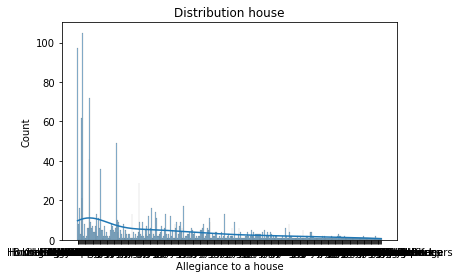

In [6]:
#checking the distribution of the columns with missing values
house_dist = GOT['house'].describe()
print(house_dist)

#constructing the histplot
sns.histplot(data  = GOT,
         x     = 'house',
        kde    = True)

plt.title(label   = "Distribution house")
plt.xlabel(xlabel = "Allegiance to a house") 
plt.ylabel(ylabel = "Count")

plt.show()

In [7]:
#Replacing the missing values with the mode
house_mode = GOT['house'].mode()

GOT['house'].fillna(value = house_mode,
                         inplace = True)

# Base Model

In [8]:
df_corr = GOT.corr(method = 'pearson').round(decimals=2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
age                           0.09
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveMother                -0.04
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [9]:
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

## Regressions

In [10]:
#creting new variables to improve the model
GOT['long_term_pop'] = GOT['popularity']*GOT['book4_A_Feast_For_Crows']
GOT['imp'] = GOT['isNoble']*GOT['isMarried']*GOT['numDeadRelations']

In [11]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive~
                                    book4_A_Feast_For_Crows+
                                    book5_A_Dance_with_Dragons+
                                    book3_A_Storm_Of_Swords+
                                    isNoble+
                                    isMarried+
                                    book2_A_Clash_Of_Kings+
                                    book1_A_Game_Of_Thrones+
                                    popularity+
                                    long_term_pop+
                                    numDeadRelations""",
                                     data    = GOT)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.486201
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.143     
Dependent Variable:    isAlive             AIC:                 1914.2942 
Date:                  2021-12-05 17:17    BIC:                 1975.6031 
No. Observations:      1946                Log-Likelihood:      -946.15   
Df Model:              10                  LL-Null:             -1103.5   
Df Residuals:          1935                LLR p-value:         1.1544e-61
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   1.1920   0.1140 10.4604 0.0000  0.9687  1.4154
book4_A_Feast_For_Crows     1.3326   0.1546  8.6175 0.0000  1.0295  1.6356
book5_A_Dance_with_Dragons -0.0575   0.1357 -0.4240 0.6716 -0.3236  0.2085
book3_A_Storm_Of_Swords    -0.3675   0.1393 -2.6381 0.0083 -0.6405 -0.0945
isNoble                    -0.1947   0.1189 -1.6373 0.1016 -0.4278  0.0384
isMarried                  -0.1238   0.1740 -0.7114 0.4768 -0.4648  0.2172
book2_A_Clash_Of_Kings     -0.3094   0.1359 -2.2769 0.0228 -0.5757 -0.0431
book1_A_Game_Of_Thrones    -0.7089   0.1500 -4.7270 0.0000 -1.0029 -0.4150
popularity                 -5.6686   1.0610 -5.3426 0.0000 -7.7482 -3.5890
long_term_pop               5.7428   1.1203  5.1261 0.0000  3.5470  7.9385
numDeadRelations           -0.1356   0.0522 -2.5976 0.0094 -0.2379 -0.0333
==========================================================================

"""

In [12]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive~
                                    book4_A_Feast_For_Crows+
                                    book3_A_Storm_Of_Swords+
                                    isNoble+
                                    book2_A_Clash_Of_Kings+
                                    book1_A_Game_Of_Thrones+
                                    popularity+
                                    numDeadRelations""",
                                     data    = GOT)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.496248
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.125     
Dependent Variable:   isAlive            AIC:                1947.3986 
Date:                 2021-12-05 17:17   BIC:                1991.9868 
No. Observations:     1946               Log-Likelihood:     -965.70   
Df Model:             7                  LL-Null:            -1103.5   
Df Residuals:         1938               LLR p-value:        9.3258e-56
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.8883   0.0985  9.0214 0.0000  0.6953  1.0813
book4_A_Feast_For_Crows  1.6680   0.1334 12.5046 0.0000  1.4066  1.9295
book3_A_Storm_Of_Swords -0.3130   0.1363 -2.2973 0.0216 -0.5801 -0.0460
isNoble                 -0.1898   0.1150 -1.6502 0.0989 -0.4152  0.0356
book2_A_Clash_Of_Kings  -0.2367   0.1333 -1.7747 0.0759 -0.4980  0.0247
book1_A_Game_Of_Thrones -0.5735   0.1452 -3.9483 0.0001 -0.8582 -0.2888
popularity              -1.4584   0.4207 -3.4668 0.0005 -2.2829 -0.6339
numDeadRelations        -0.1443   0.0485 -2.9734 0.0029 -0.2395 -0.0492
=======================================================================

"""

In [13]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive~
                                    book4_A_Feast_For_Crows+
                                    book3_A_Storm_Of_Swords+
                                    isNoble+
                                    book2_A_Clash_Of_Kings+
                                    book1_A_Game_Of_Thrones+
                                    popularity+
                                    long_term_pop+
                                    numDeadRelations""",
                                     data    = GOT)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.486375
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.142     
Dependent Variable:   isAlive            AIC:                1910.9704 
Date:                 2021-12-05 17:17   BIC:                1961.1322 
No. Observations:     1946               Log-Likelihood:     -946.49   
Df Model:             8                  LL-Null:            -1103.5   
Df Residuals:         1937               LLR p-value:        4.0614e-63
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.1852   0.1127 10.5159 0.0000  0.9643  1.4061
book4_A_Feast_For_Crows  1.3027   0.1475  8.8338 0.0000  1.0137  1.5917
book3_A_Storm_Of_Swords -0.3703   0.1389 -2.6662 0.0077 -0.6425 -0.0981
isNoble                 -0.2041   0.1182 -1.7272 0.0841 -0.4358  0.0275
book2_A_Clash_Of_Kings  -0.3175   0.1354 -2.3452 0.0190 -0.5828 -0.0522
book1_A_Game_Of_Thrones -0.7117   0.1480 -4.8087 0.0000 -1.0018 -0.4216
popularity              -5.8160   1.0598 -5.4878 0.0000 -7.8931 -3.7388
long_term_pop            5.8179   1.1287  5.1544 0.0000  3.6057  8.0302
numDeadRelations        -0.1398   0.0521 -2.6844 0.0073 -0.2418 -0.0377
=======================================================================

"""

In [14]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive~
                                    book4_A_Feast_For_Crows+
                                    book1_A_Game_Of_Thrones+
                                    popularity+
                                    long_term_pop""",
                                     data    = GOT)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.493129
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.130     
Dependent Variable:   isAlive            AIC:                1929.2563 
Date:                 2021-12-05 17:17   BIC:                1957.1239 
No. Observations:     1946               Log-Likelihood:     -959.63   
Df Model:             4                  LL-Null:            -1103.5   
Df Residuals:         1941               LLR p-value:        4.5640e-61
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.9574   0.0938 10.2015 0.0000  0.7735  1.1413
book4_A_Feast_For_Crows  1.1266   0.1348  8.3553 0.0000  0.8623  1.3909
book1_A_Game_Of_Thrones -0.8744   0.1416 -6.1748 0.0000 -1.1519 -0.5968
popularity              -6.6342   1.0429 -6.3613 0.0000 -8.6782 -4.5902
long_term_pop            5.4641   1.1198  4.8794 0.0000  3.2692  7.6589
=======================================================================

"""

## Candidate models

In [15]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'full'   : ['book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 
            'book3_A_Storm_Of_Swords', 'isNoble', 'isMarried',
            'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones', 
            'popularity', 'long_term_pop','numDeadRelations'],
 
 # significant variables only (set 1)
 'sig'    : ['book4_A_Feast_For_Crows','book3_A_Storm_Of_Swords',
             'isNoble','book2_A_Clash_Of_Kings',
             'book1_A_Game_Of_Thrones','popularity',
             'numDeadRelations'],
    
 # significant variables only (set 2)
 'sig_2'  : ['book4_A_Feast_For_Crows','book3_A_Storm_Of_Swords',
             'isNoble','book2_A_Clash_Of_Kings',
             'book1_A_Game_Of_Thrones','popularity','long_term_pop',
             'numDeadRelations'],
    
# significant variables only (set 3)
 'sig_3'  : ['book4_A_Feast_For_Crows',
             'book1_A_Game_Of_Thrones','popularity','long_term_pop'],
    
# significant variables only (set 4)
 'sig_4'  : ['book4_A_Feast_For_Crows',
             'book1_A_Game_Of_Thrones','popularity','long_term_pop', 'imp']
    
}

## Declaring variables

In [16]:
# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

# Logistic Regression

In [17]:
# declaring explanatory variables
GOT_data_log = GOT.loc[: , candidate_dict['sig_4']]

In [18]:
# train-test split
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
            GOT_data_log,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)

## Hyperparameter Tuning

In [19]:
# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(GOT_data_log, GOT_target)

# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.9000000000000004}
Tuned CV AUC      : 0.6016


## Model

In [20]:
# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.8,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(GOT_data_log, GOT_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_log_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(X_log_train, y_log_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(X_log_test, y_log_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_log_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(X_log_train, y_log_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(X_log_test, y_log_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc_score         = roc_auc_score(y_true  = y_log_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7773
LR Tuned Testing  ACCURACY: 0.8564
LR Tuned AUC Score        : 0.7397


## Visualization

In [21]:
#defining visual confusion matrix
def visual_cm(true_y, pred_y, labels = None):
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    
    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)

    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Greens',
                fmt         = 'g')
    
    # heatmap labels
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [22]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_log_test, y_pred = lr_tuned_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 3
True Positives : 142



### Confusion Matrix

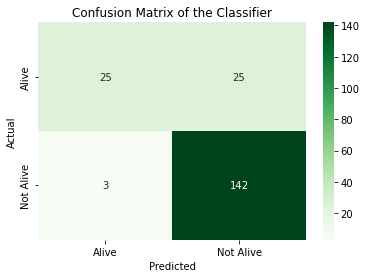

In [23]:
# calling the visual_cm function
visual_cm(true_y = y_log_test,
          pred_y = lr_tuned_pred,
          labels = ['Alive', 'Not Alive'])

# Classification Tree (CART Model)

In [24]:
# declaring explanatory variables
GOT_data_Tree = GOT.loc[: , candidate_dict['full']]

# train-test split
X_Tree_train, X_Tree_test, y_Tree_train, y_Tree_test = train_test_split(
            GOT_data_Tree,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)

## Hyperparameter Tuning

In [25]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(GOT_data_Tree, GOT_target)

# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 12, 'max_depth': 5, 'criterion': 'entropy'}
Tuned Training AUC: 0.6699


## Model

In [26]:
# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 12,
                                    max_depth        = 8,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(GOT_data_Tree, GOT_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_Tree_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_Tree_train, y_Tree_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_Tree_test, y_Tree_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_Tree_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_Tree_train, y_Tree_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_Tree_test, y_Tree_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc_score         = roc_auc_score(y_true  = y_Tree_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8104
Testing  ACCURACY: 0.8769
AUC Score        : 0.819


## Visualization

In [27]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_Tree_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 9
True Positives : 136



### Confusion Matrix

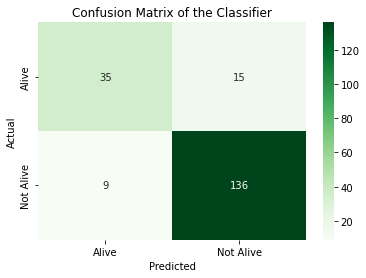

In [28]:
# calling the visual_cm function
visual_cm(true_y = y_Tree_test,
          pred_y = tree_tuned_pred,
          labels = ['Alive', 'Not Alive'])

# Random Forest

In [29]:
# declaring explanatory variables
GOT_data_RF = GOT.loc[: , candidate_dict['full']]

# train-test split
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(
            GOT_data_RF,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)

In [30]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

## Hyperparameter Tuning

In [31]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_RF_train, y_RF_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_RF_test)


# declaring a hyperparameter space
estimator_range  = np.arange(50, 100, 25)
leaf_range       = np.arange(1, 100, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}

# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)

# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 50,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(GOT_data_RF, GOT_target)

# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 75, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.6587


## Model

In [32]:
# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 5,
                                      max_depth        = 8,
                                      n_estimators     = 75,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data_RF, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(X_RF_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_RF_train, y_RF_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_RF_test, y_RF_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_RF_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_RF_train, y_RF_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_RF_test, y_RF_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_RF_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8304
Forest Tuned Testing  ACCURACY: 0.8974
Forest Tuned AUC Score        : 0.8131


## Visualization

In [33]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_RF_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 2
True Positives : 143



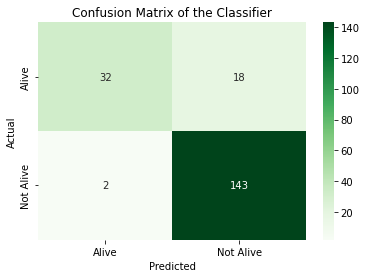

In [34]:
# calling the visual_cm function
visual_cm(true_y = y_RF_test,
          pred_y = forest_tuned_pred,
          labels = ['Alive', 'Not Alive'])

# Gradient Boosting

In [35]:
# declaring explanatory variables
GOT_data_GB = GOT.loc[: , candidate_dict['sig']]

# train-test split
X_GB_train, X_GB_test, y_GB_train, y_GB_test = train_test_split(
            GOT_data_GB,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target)

## Hyperparameter Tuning

In [36]:
# declaring a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(50, 100, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 50,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(GOT_data_GB, GOT_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 75, 'max_depth': 2, 'learning_rate': 0.1}
Tuned Training AUC: 0.6556


## Model

In [37]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 8,
                                       n_estimators  = 50,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_data_GB, GOT_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_GB_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_GB_train, y_GB_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_GB_test, y_GB_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_GB_test,
                                          y_score = gbm_tuned_pred).round(4))

# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned.score(X_GB_train, y_GB_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned.score(X_GB_test, y_GB_test).round(4)   # accuracy

# saving the AUC score
gbm_auc_score = roc_auc_score(y_true  = y_GB_test,
                                 y_score = gbm_tuned_pred).round(4) # auc

Training ACCURACY: 0.8806
Testing  ACCURACY: 0.9282
AUC Score        : 0.8731


# Visualization

In [38]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_GB_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 2
True Positives : 143



### Confusion Matrix

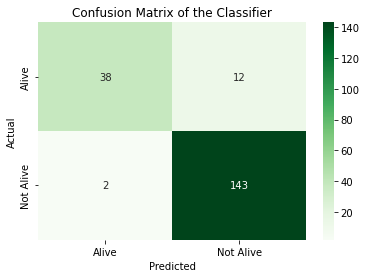

In [39]:
# calling the visual_cm function
visual_cm(true_y = y_GB_test,
          pred_y = gbm_tuned_pred,
          labels = ['Alive', 'Not Alive'])

# Model Comparison

In [45]:
# comparing results
print(f"""
Model                              Training     Testing     AUC Score    TN, FP, FN, TP
-----                              ---------    --------    ---------    --------------
Logistic                           {lr_tuned_train_score}       {lr_tuned_test_score}      {lr_tuned_auc_score}       {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
CART                               {tree_tuned_train_score}       {tree_tuned_test_score}      {tree_tuned_auc_score}        {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Random Forest                      {forest_tuned_train_score}       {forest_tuned_test_score}      {forest_tuned_auc}       {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
Gradient Boosting (FINAL MODEL)    {gbm_tuned_train_score}       {gbm_tuned_test_score}      {gbm_auc_score}       {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}
""")


Model                              Training     Testing     AUC Score    TN, FP, FN, TP
-----                              ---------    --------    ---------    --------------
Logistic                           0.7773       0.8564      0.7397       (25, 25, 3, 142)
CART                               0.8104       0.8769      0.819        (35, 15, 9, 136)
Random Forest                      0.8304       0.8974      0.8131       (32, 18, 2, 143)
Gradient Boosting (FINAL MODEL)    0.8806       0.9282      0.8731       (38, 12, 2, 143)

